In [1]:
import sys
sys.path.append('../../thesis/fuzzy-tools') # or just install the module

In [2]:
%load_ext autoreload
%autoreload 2
from fuzzytools.files import get_filedirs
import pandas as pd
import numpy as np
from fuzzytools.matplotlib.utils import save_fig

def get_df(rootdir):
    filedirs = get_filedirs(rootdir)
    dfs = []
    for filedir in filedirs:
        df = pd.read_csv(filedir)
        for c in df.columns:
            df[c] = df[c].astype(float)
        #print(f'filedir={filedir}')
        #display(df)
        dfs += [df]
    new_df = pd.concat(dfs)
    new_df['JD'] = new_df['JDATE']+new_df['JDAY']
    new_df = new_df.sort_values(by=['JD'])
    return new_df
        
rootdir = '../data/R'
df = get_df(rootdir)
df

,SRC,CSC,S,JDATE,JDAY,IT,IH,ET,EH,WS,WD,RL,SD,RC,JD
0,0.0,0.0,0.0,2459605.0,-0.059803,25.5,39.2,26.120,44.730,NaN,NaN,NaN,9.730,NaN,2.459605e+06
1,1.0,0.0,0.0,2459605.0,-0.059560,25.5,39.5,26.210,44.800,NaN,NaN,NaN,80.610,NaN,2.459605e+06
2,2.0,0.0,0.0,2459605.0,-0.059329,25.5,39.6,26.220,44.960,NaN,NaN,NaN,125.510,NaN,2.459605e+06
3,0.0,0.0,0.0,2459605.0,-0.054398,25.6,39.1,25.730,44.680,NaN,NaN,NaN,6.330,NaN,2.459605e+06
4,1.0,0.0,0.0,2459605.0,-0.052060,25.5,37.6,25.610,44.830,NaN,NaN,NaN,6.230,NaN,2.459605e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10255,10254.0,0.0,0.0,2459614.0,0.365926,24.5,45.3,24.654,50.908,0.000,45.0,NaN,5.684,2.515,2.459614e+06
10256,10255.0,0.0,0.0,2459614.0,0.366065,24.6,45.3,24.654,50.908,0.000,45.0,NaN,5.784,2.515,2.459614e+06
10257,10256.0,0.0,0.0,2459614.0,0.366192,24.6,45.3,24.654,50.938,0.000,45.0,NaN,5.784,2.515,2.459614e+06
10258,10257.0,0.0,0.0,2459614.0,0.366331,24.6,45.3,24.654,50.961,0.000,45.0,NaN,5.784,2.515,2.459614e+06


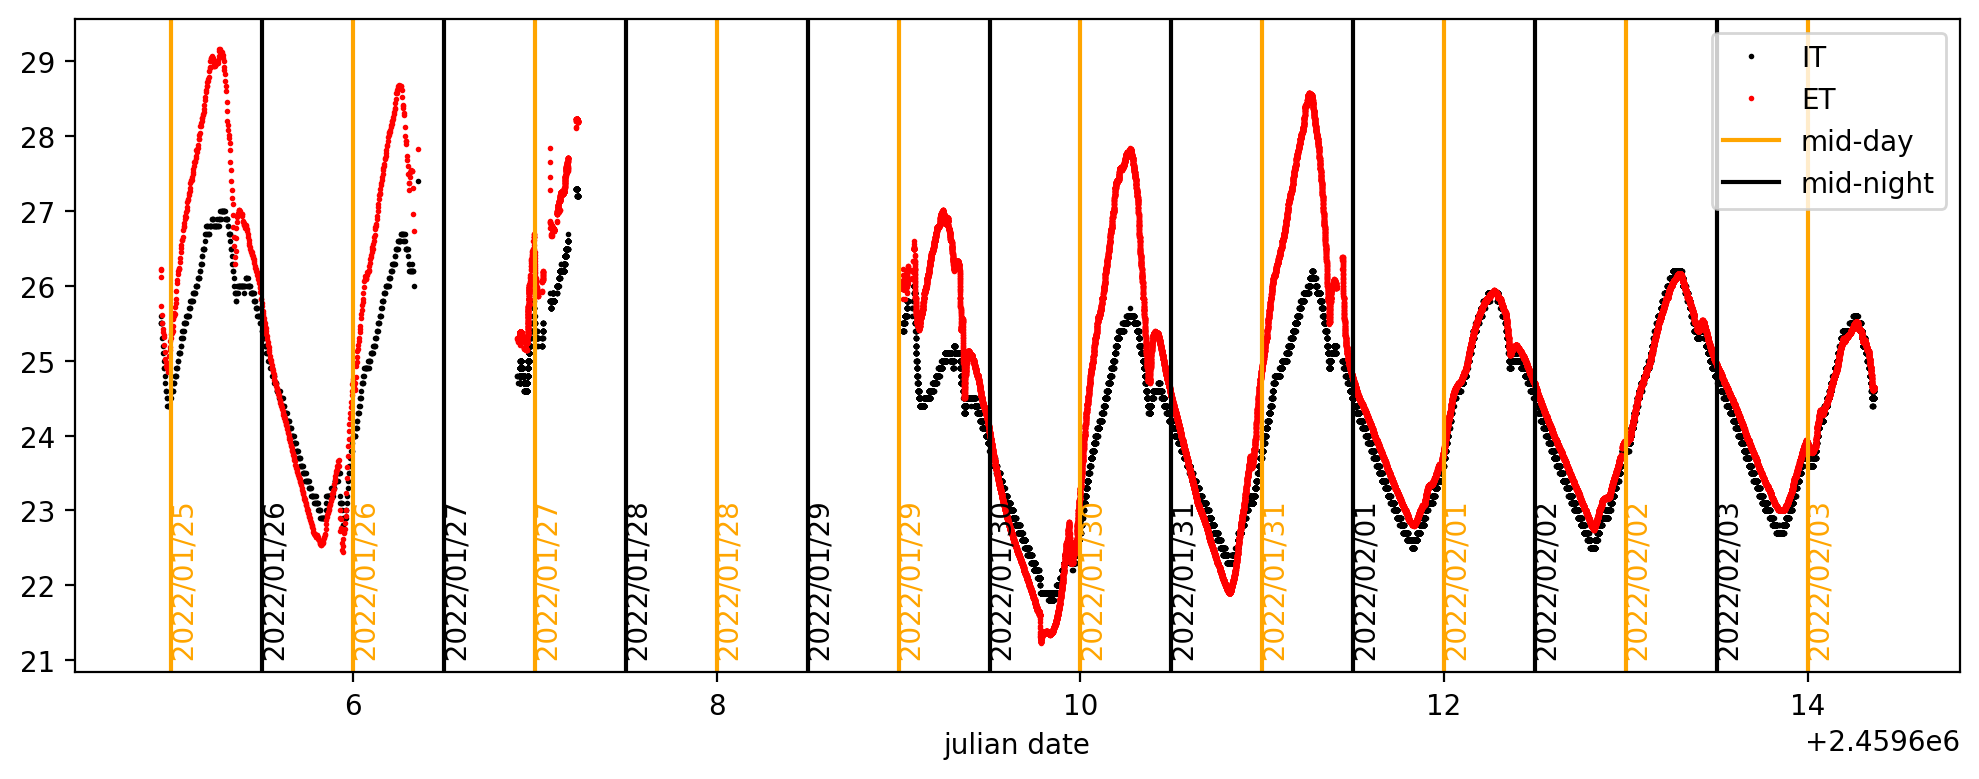

In [5]:
import matplotlib.pyplot as plt
from astropy.time import Time

def get_middays(mjd):
    min_mjd = np.min(mjd)
    max_mjd = np.max(mjd)
    l = []
    x = np.floor(min_mjd)+12/24-0.5
    while True:
        x += 1
        if x>max_mjd:
            break
        l += [x]
    return l
    
def get_midnights(mjd):
    min_mjd = min(mjd)
    max_mjd = max(mjd)
    l = []
    x = np.ceil(min_mjd)+0/24-0.5
    while True:
        x += 1
        if x>max_mjd:
            break
        l += [x]
    return l

fig, ax = plt.subplots(1, 1, figsize=(10,4), dpi=200)
ax.plot(df['JD'], df['IT'], 'o', c='k', ms=1, label='IT')
ax.plot(df['JD'], df['ET'], 'o', c='r', ms=1, label='ET')

for k,midday in enumerate(get_middays(df['JD'])):
    ax.axvline(midday, c='orange', label='mid-day' if k==0 else None)
    datetime = Time(midday, format='jd', scale='utc').to_datetime()
    ax.text(midday, min(ax.get_ylim()), ' '*2+str(datetime).split(' ')[0].replace('-', '/'), c='orange', rotation=90)
    
for k,midnight in enumerate(get_midnights(df['JD'])):
    ax.axvline(midnight, c='k', label='mid-night' if k==0 else None)
    datetime = Time(midnight, format='jd', scale='utc').to_datetime()
    ax.text(midnight, min(ax.get_ylim()), ' '*2+str(datetime).split(' ')[0].replace('-', '/'), c='k', rotation=90)

ax.set_xlabel('julian date')
ax.legend(loc='upper right')
fig.tight_layout()
save_fig(fig, f'../temp/img.pdf', closes_fig=0)
plt.show()